# Introduction to Reinforcement Learning

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Introduction

### Recent stories

* DeepMind demonstrated a system that could learn to play just about any Atari game **from scratch, ventually outperforming humans.**

* Using only raw pixels as inputs and **without any prior knowledge of the rules of the games**

* RL is boiling with new ideas, with a wide range of applications

* Is RL the right approach towards artificial general intelligence (AGI)?


### Topics of today

* Apply the power of Deep Learning to the field of Reinforcement Learning

* what Reinforcement Learning is

* Deep Reinforcement Learning: **policy gradients and deep Q networks (DQNs)**, including a discussion of **Markov decision processes (MDPs)**.

* Q-Learning, Approximate Q-Learning, and Deep Q-Learning


## What is reinforcement learning?

* Reinforcement learning (RL) is an area of machine learning concerned with how **intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward**. 

* Reinforcement learning is **one of three basic machine learning** paradigms, alongside supervised learning and unsupervised learning.

* While in supervised learning we rely on the dataset with known outcomes, RL is based on **learning by doing**. 
     - For example, when we first see a computer game, we start playing, even without knowing the rules, and soon we are able to improve our skills just by the process of playing and adjusting our behavior.

* Reinforcement learning differs from supervised learning in **not needing labelled input/output pairs** be presented.



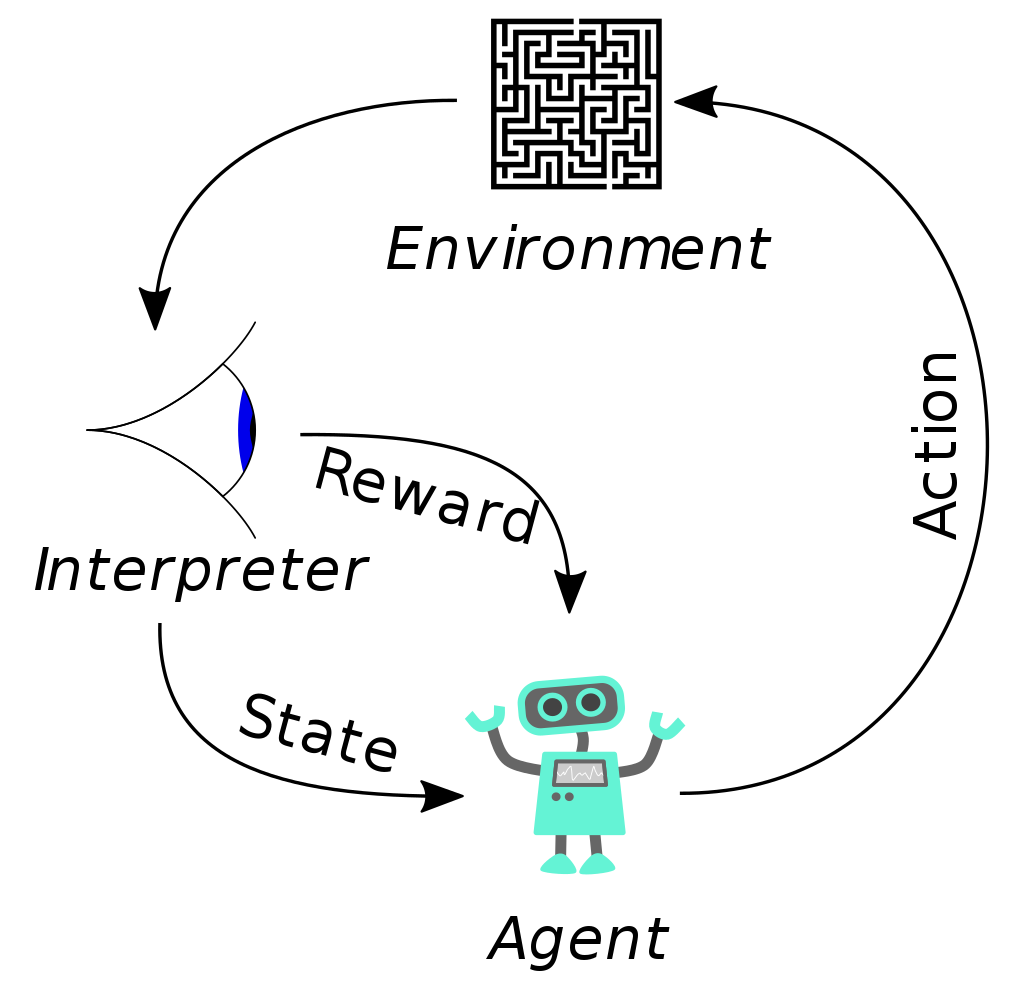

## To perform RL, we need:

* An **environment** or **simulator** that sets the rules of the game. We should be able to run the experiments in the simulator and observe the results.
* Some **Reward function**, which indicate how successful our experiment was. In case of learning to play a computer game, the reward would be our final score.

* Based on the reward function, we should be able to **adjust our behavior and improve our skills, so that the next time we play better**. 
* The main difference between other types of machine learning and RL is that in RL we typically **do not know whether we win or lose until we finish the game**. Thus, we cannot say whether a certain move alone is good or not - we only receive a reward at the end of the game.
* Fhe focus is on finding a balance between **exploration (of uncharted territory) and exploitation (of current knowledge)**.
    * During RL, we typically perform many experiments. During each experiment, we need to balance between following the optimal strategy that we have learned so far (**exploitation**) and exploring new possible states (**exploration**).

### Basic reinforcement is modeled as a Markov decision process (MDP):

* a software **agent** makes **observations** and takes **actions** within an **environment**, and in return it receives **rewards**
* a set of environment and agent states, S;
* a set of actions, A, of the agent;
* ${\displaystyle P_{a}(s,s')=\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)}$ is the probability of transition (at time ${\displaystyle t}$) from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action ${\displaystyle a}$.

* ${\displaystyle R_{a}(s,s')}$ is the **immediate reward** after transition from ${\displaystyle s}$ to ${\displaystyle s'}$ with action ${\displaystyle a}$.


* The purpose of reinforcement learning is for the agent to **learn an optimal, or nearly-optimal, policy that maximizes the "reward function"** or other user-provided reinforcement signal that accumulates from the immediate rewards.

* **the agent acts in the environment and learns by trial and error to maximize(optimize) rewards**

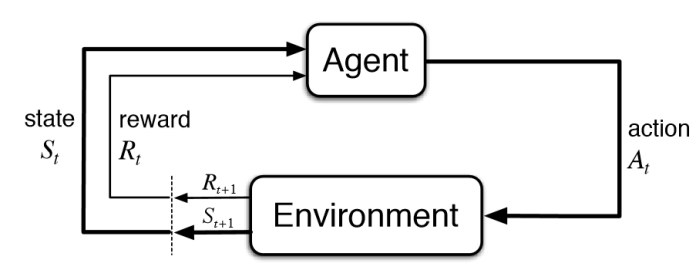

***Notes***

* Many reinforcement learning algorithms use **dynamic programming** techniques.

* The main difference between the classical dynamic programming methods and reinforcement learning algorithms is that the latter **do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible**.

### Reinforcement Learning examples

a. get positive rewards whenever it approaches the target destination, and negative rewards whenever it wastes time or goes in the wrong direction

b. the environment is a simulation of the Atari game, the actions are the nine possible joystick positions (upper left, down, center, and so on), the observations are screenshots, and the rewards are just the game points.

c. the agent can be the program playing a board game such as Go

d. The agent does not have to control a physically (or virtually) moving thing

e. The agent can observe stock market prices and decide how much to buy or sell every second. Rewards are obviously the monetary gains and losses

And many more such as self-driving cars, recommender systems, placing ads on a web page etc.


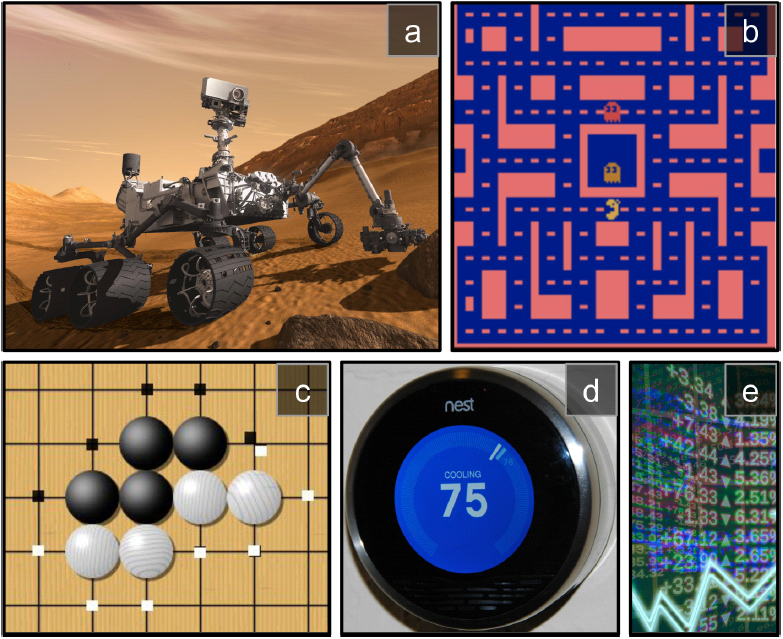

## Policy Search

* The **algorithm** a software agent uses to determine its actions is called its **policy**
* The policy can be **any algorithm**, can be rule-based or ML
* For example, the policy could be a neural network taking observations as inputs and outputting the action to take

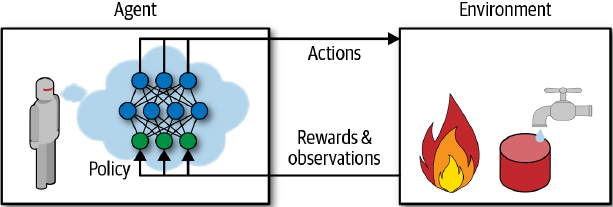

## How to train reinforcement learning model?

* a robotic vacuum cleaner whose **reward is the amount of dust** it picks up in 30 minutes
* Its policy could be to move forward with some probability p every second, or randomly rotate left or right with probability 1 – p.
* The rotation angle would be a random angle between –r and +r.
* stochastic policy
* Train the model: two policy parameters you can tweak: the **probability p** and the **angle range r**.
* Brute force grid search of p and r.
* Like searching needle in haystack
* Or genetic algorithm -- a random search

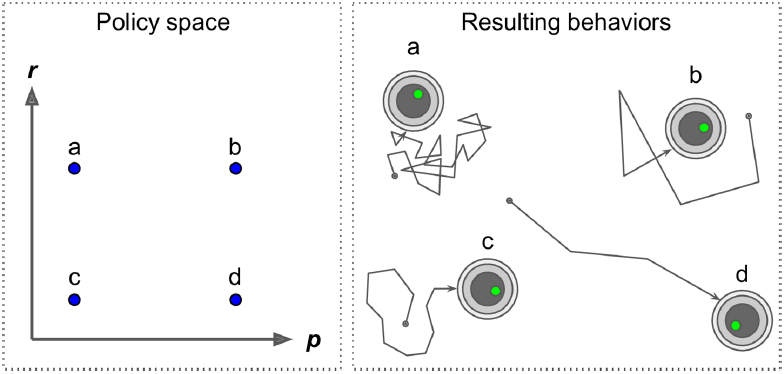

### Any better ideas to train the model?

* The two approaches above are too slow.
* **Policy gradients (PG) by Gradient Ascent**: by evaluating the gradients of the rewards with regard to the policy parameters, then tweaking these parameters by following the gradients toward higher rewards.


# Introduction to OpenAI gym

* you first need to have a working environment to train Reinforcement Learning

* training is hard and slow in the real world, so you generally need a simulated environment 

* The [OpenAI Gym](https://gym.openai.com/) is a great tool for RL - a **simulation environment**, which can simulate many different environments starting from Atari games, to the physics behind pole balancing. 

* It is one of the most popular simulation environments for training reinforcement learning algorithms, and is maintained by [OpenAI](https://openai.com/).

In this notebook we will be using [OpenAI gym](https://gym.openai.com/), a great toolkit for developing and comparing Reinforcement Learning algorithms. It provides many environments for your learning *agents* to interact with. Let's start by importing `gym`:

In [40]:
pip install --upgrade gym

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [41]:
pip install gymnasium[classic-control]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import gym

Let's list all the available environments:

In [5]:
gym.envs.registry

{'CartPole-v0': EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=0),
 'CartPole-v1': EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1),
 'MountainCar-v0': EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='MountainCar', version=0),
 'Mounta

## CartPole Balancing

* You have probably all seen modern balancing devices such as the *Segway* or *Gyroscooters*. 

* They are able to automatically balance by adjusting their wheels in response to a signal from an accelerometer or gyroscope. 

* A simplified version of balancing is known as a **CartPole** problem but this pole balancing only occurs in 1D. In the cartpole world, we have a horizontal slider that can move left or right, and the goal is to balance a vertical pole on top of the slider as it moves.


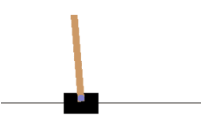

To create and use this environment, we need a couple of lines of Python code:

In [42]:
env = gym.make('CartPole-v1', render_mode="rgb_array")

Let's initialize the environment by calling is `reset()` method. This returns an observation:

In [43]:
# env.seed(42)
obs, _= env.reset() # ignore the second part of the return by using "_"

Observations vary depending on the environment. In this case it is a 1D NumPy array composed of 4 floats: they represent the cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity.

In [44]:
obs

array([ 0.02883522,  0.00439387,  0.03312008, -0.02759673], dtype=float32)

**1D NumPy array composed of 4 floats**

* cart's horizontal position(0.0 = center)
* its velocity(positive means right)
* the angle of the pole (0 = vertical)
* the angular velocity(positive means clockwise).


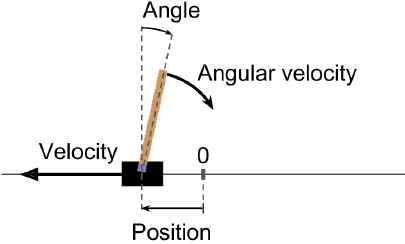

An environment can be visualized by calling its `render()` method, and you can pick the rendering mode (the rendering options depend on the environment).

**Warning**: some environments (including the Cart-Pole) require access to your display, which opens up a separate window, even if you specify `mode="rgb_array"`. In general you can safely ignore that window. However, if Jupyter is running on a headless server (ie. without a screen) it will raise an exception. One way to avoid this is to install a fake X server like [Xvfb](http://en.wikipedia.org/wiki/Xvfb). On Debian or Ubuntu:

```bash
$ apt update
$ apt install -y xvfb
```

You can then start Jupyter using the `xvfb-run` command:

```bash
$ xvfb-run -s "-screen 0 1400x900x24" jupyter notebook
```

Alternatively, you can install the [pyvirtualdisplay](https://github.com/ponty/pyvirtualdisplay) Python library which wraps Xvfb:

```bash
python3 -m pip install -U pyvirtualdisplay
```

And run the following code:

In [9]:
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In this example we will set `mode="rgb_array"` to get an image of the environment as a NumPy array:

In [10]:
img = env.render() 
img.shape

(400, 600, 3)

In [11]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

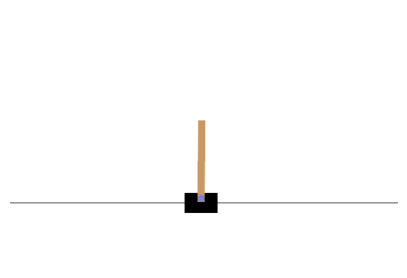

In [12]:
plot_environment(env)
plt.show()

Let's see how to interact with an environment. Your agent will need to select an action from an **"action space" (the set of possible actions)**. Let's see what this environment's action space looks like:

In [13]:
env.action_space

Discrete(2)

**two possible actions: accelerate towards the left or towards the right.**

Since the pole is leaning toward the right (`obs[2] > 0`), let's accelerate the cart toward the right:

In [45]:
action = 1  # accelerate right
env.step(action)

C:\Users\srikr\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([ 0.0289231 ,  0.19902559,  0.03256814, -0.30964866], dtype=float32),
 1.0,
 False,
 False,
 {})

In [15]:
# in old API
# obs, reward, done, info= env.step(action)

# in new API
obs, reward, terminated, truncated, info= env.step(action)
obs

array([-0.03018822,  0.427658  ,  0.00072241, -0.55569553], dtype=float32)

Notice that the cart is now moving toward the right (`obs[1] > 0`). The pole is still tilted toward the right (`obs[2] > 0`), but its angular velocity is now negative (`obs[3] < 0`), so it will likely be tilted toward the left after the next step.

### The step() method executes the given action and returns five values:

* obs - This is the new observation. The cart is now moving toward the right (obs[1] > 0). The pole is still tilted toward the right (obs[2] > 0), but its angular velocity is now negative (obs[3] < 0), so it will likely be tilted toward the left after the next step.
* reward - In this environment, you get a **reward of 1.0 at every step**, no matter what you do, so the goal is to keep the episode **running as long as possible**.
* (old API) done - This value will be True when the episode is over. This will happen when the pole tilts too much, or goes off the screen, or **after 200 steps (in this last case, you have won)**. After that, the environment must be reset before it can be used again.
* (new API), done is split into 2 parts:
    * terminated=True if environment terminates (eg. due to task completion, failure etc.)
    * truncated=True if episode truncates due to a time limit or a reason that is not defined as part of the task MDP.
    * To make the API backward compatible, use `done = truncated or terminated `

* info - This environment-specific dictionary can provide some extra information that you may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

Saving figure cart_pole_plot


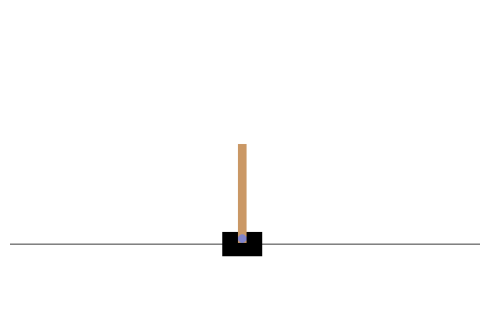

In [16]:
plot_environment(env)
save_fig("cart_pole_plot")

Looks like it's doing what we're telling it to do!

The environment also tells the agent how much reward it got during the last step:

In [17]:
reward

1.0

When the game is over, the environment returns `done=True`:

In [18]:
done = truncated or terminated 
done

False

Finally, `info` is an environment-specific dictionary that can provide some extra information that you may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

In [19]:
info

{}

* The **sequence of steps** between the moment the environment is reset until it is done is called an **"episode"**. 
* At the end of an episode (i.e., when `step()` returns `done=True`), you should reset the environment before you continue to use it.

In [20]:
if done:
    obs = env.reset()

## Let's start from a random policy as a baseline model

In [48]:
import gym
env = gym.make('CartPole-v1', render_mode="rgb_array")

env.reset()
done = False
total_reward = 0
while not done:
    env.render()
    action = env.action_space.sample() # take random action
    obs, reward, terminated, truncated, info = env.step(action); done = truncated or terminated 
    total_reward += reward

print(f"Total reward: {total_reward}")

Total reward: 23.0


### Each environment can be accessed exactly in the same way:
* `env.reset` starts a new experiment
* `env.step` performs a simulation step. It receives an **action** from the **action space**, and returns an **observation** (from the observation space), as well as a reward and a termination flag.

In the example above we perform a random action at each step, which is why the experiment life is very short:

<img src="https://yu.instructure.com/files/3675398/download?download_frd=1" width="750" align="center">

### How can we make the pole remain upright? 

The goal of a RL algorithm is to train a model - the so called **policy** &pi; - which will return the action in response to a given state. We can also consider policy to be probabilistic, eg. for any state *s* and action *a* it will return the probability &pi;(*a*|*s*) that we should take *a* in state *s*.

* We will need to define a **_policy_** for that. 
* This is the **strategy that the agent will use to select an action at each step**. 
* It can use all the past actions and observations to decide what to do.

<img src="https://yu.instructure.com/files/3675564/download?download_frd=1" width="750" align="center">

# A simple hard-coded policy

### Let's hard code a simple strategy: 

* Accelerates left when the pole is leaning toward the left
* Accelerates right when the pole is leaning toward the right
* Run 500 episodes to see the average rewards it gets 

In [47]:
env.reset(seed=42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, _ = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, terminated, truncated, info = env.step(action); done = truncated or terminated 
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [23]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.18, 9.015963620157304, 24.0, 72.0)

Well, as expected, this strategy is a bit too basic: the best it did was to keep the poll up for only 72 steps. This environment is considered solved when the agent keeps the pole up for 200 steps.

Let's visualize one episode:

In [24]:
env.reset(seed=42)

frames = []

obs, _ = env.reset()
for step in range(200):
    img = env.render()
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, terminated, truncated, info = env.step(action); done = truncated or terminated 
    if done:
        break

Now show the animation:

In [25]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [26]:
plot_animation(frames)

### Now we see the problem

**Clearly the system is unstable and after just a few wobbles, the pole ends up too tilted: game over. We will need to be smarter than that!**

# Neural Network Policies

* Let's create a neural network that will take **observations as inputs**, and **output the probabilities of actions to take for each observation**. 
* To choose an action, the network will **estimate a probability for each action**, then we will **select an action randomly according to the estimated probabilities**. 
* In the case of the Cart-Pole environment, there are just two possible actions (left or right), so we only need one output neuron: it will output the probability `p` of the action 0 (left), and of course the probability of action 1 (right) will be `1 - p`.
* For example, if it outputs 0.7, then we will pick **action 0 with 70% probability**, or **action 1 with 30% probability**.
* This approach lets the agent find the right balance between **exploring new actions and exploiting the actions that are known to work well**.(In general, exploitation will result in choosing actions with a greater short-term reward, whereas exploration can potentially result in greater total rewards in the long run.) 
* You do the same in restaurant!
* **Simplified**: the past actions and observations can safely be ignored, **since each observation contains the environment’s full state**

    * if the environment only revealed the position of the cart but not its velocity, you would have to consider not only the current observation but also the previous observation in order to estimate the current velocity.
    * Another example is when the observations are noisy; in that case, you generally want to use the past few observations to estimate the most likely current state.
    * The CartPole problem is thus as simple as can be; the observations are noise-free, and they contain the environment’s full state.


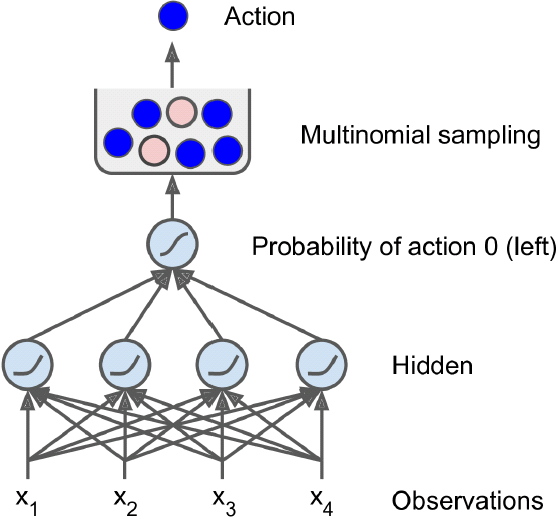

In [27]:
import sys
print(sys.version)

3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]


In [28]:
import sys
print(sys.executable)

c:\Program Files\Python311\python.exe


In [29]:
!{sys.executable} -m pip install --upgrade torch

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
import torch

In [31]:
# PyTorch version

num_inputs = 4
num_actions = 2

model = torch.nn.Sequential(
    torch.nn.Linear(num_inputs, 5, dtype=torch.float32),
    torch.nn.ELU(),
    torch.nn.Linear(5, 1, dtype=torch.float32),
    torch.nn.Sigmoid()
)

In [51]:
# Tensorflow version
import keras
import tensorflow as tf
from keras.models import Sequential

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

Let's write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [33]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make('CartPole-v1', render_mode="rgb_array")
    env.reset(seed=seed)
    np.random.seed(seed)
    obs, _ = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render())
        left_proba = model(torch.from_numpy(obs.reshape(1, -1)))
        action = int(np.random.rand() > left_proba)  # randomly generate the action according to the predicted probability
        obs, reward, terminated, truncated, info = env.step(action); done = truncated or terminated  # Take the action
        if done:
            break
    env.close()
    return frames

Now let's look at how well this randomly initialized policy network performs:

In [34]:
frames = render_policy_net(model)
plot_animation(frames)

C:\Users\srikr\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


### It runs pretty bad. We haven't trained the NN.

* The neural network will have to learn to do better. 
* **First let's see if it is capable of learning the basic policy we used earlier: go left if the pole is tilting left, and go right if it is tilting right.**

We can make the same net play in 50 different environments in parallel (this will give us a diverse training batch at each step), and train for 5000 iterations. We also reset environments when they are done. We train the model using a custom training loop so we can easily use the predictions at each training step to advance the environments.

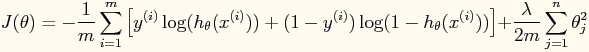

* **If we knew what the best action was at each step**, we could train the neural network as usual, by **minimizing the cross entropy between the estimated probability distribution and the target probability distribution**. 
* It would just be regular supervised learning.


In [35]:
n_environments = 50
n_iterations = 5000

# make the same net play in 50 different environments in parallel
envs = [gym.make("CartPole-v1", render_mode="rgb_array") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.reset(seed=index)
np.random.seed(42)
observations = [env.reset()[0] for env in envs]
print(observations[0])

[0.03132702 0.04127556 0.01066358 0.02294966]


In [36]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

C:\Users\srikr\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    # Use the last policy  output as training label
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations]) # 50 different environments in parallel ~ 50 groups of observations

    # Based on the current observations, we predict the probability of the next action
    left_probas = model(torch.from_numpy(np.array(observations)))
    # Improve predictions(to make the next predicted value is close to the target value) by minimizing the loss function
    # Use the gradient of the loss function to update the weights so that the next predicted value is close to the target value
    # The optimizer can speed up this process or reduce the steps required in the process

    # - np.log(sigmoid(z))     # if y=1
    # - np.log(1 - sigmoid(z)) # if y=0
    loss=torch.mean(torch.nn.functional.binary_cross_entropy(left_probas, torch.from_numpy(target_probas).float())) # across 50 different environments
    loss.backward()
    optimizer.step()
        
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.detach().numpy()), end="")

    # select an action randomly for 50 environments seperately         
    # if () return true, then goes to right(1), otherwise, goes to left(0)
    actions = (np.random.rand(n_environments, 1) > left_probas.detach().numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, terminated, truncated, info = env.step(actions[env_index][0]); done = truncated or terminated 
        observations[env_index] = obs if not done else env.reset()[0]
        
for env in envs:
    env.close()

Iteration: 37, Loss: 0.325

C:\Users\srikr\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Iteration: 4999, Loss: 0.0315

In [38]:
# Tensorflow version


# optimizer = keras.optimizers.RMSprop()
# loss_fn = keras.losses.binary_crossentropy

# for iteration in range(n_iterations):
#     # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
#     # Use the last policy  output as training label
#     target_probas = np.array([([1.] if obs[2] < 0 else [0.])
#                               for obs in observations]) # 50 different environments in parallel ~ 50 groups of observations
#     with tf.GradientTape() as tape:
#          # Based on the current observations, we predict the probability of the next action
#         left_probas = model(np.array(observations))
#         # Improve predictions(to make the next predicted value is close to the target value) by minimizing the loss function
#         # Use the gradient of the loss function to update the weights so that the next predicted value is close to the target value
#         # The optimizer can speed up this process or reduce the steps required in the process

#         # - np.log(sigmoid(z))     # if y=1
#         # - np.log(1 - sigmoid(z)) # if y=0
#         loss = tf.reduce_mean(loss_fn(target_probas, left_probas)) # across 50 different environments
#     print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
#     grads = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(grads, model.trainable_variables))
#     # select an action randomly for 50 environments seperately         
#     # if () return true, then goes to right(1), otherwise, goes to left(0)
#     actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
#     for env_index, env in enumerate(envs):
#         obs, reward, done, info = env.step(actions[env_index][0])
#         observations[env_index] = obs if not done else env.reset()

# for env in envs:
#     env.close()

In [39]:
frames = render_policy_net(model)
plot_animation(frames)

### Of course the NN learned it well.

Looks like it learned the policy correctly. 


### How to make it better?

The model should **learn a better policy on its own**, so that the pole does not wobble as much.

## Conclusion

* We have now learned the basics of RL. We have successfully tried three algorithms (3 policies), and achieved a good result in a relatively short period of time. 
* However, this is just the beginning of our journey into RL, and we will dig deeper from here.